In [3]:
import numpy as np
from astropy.io import fits
from matplotlib import rc
import matplotlib.pyplot as plt
%matplotlib inline
rc('figure', figsize=(12.0, 9.0))

In [4]:
path = 'example_data/'
lamp_on_path = 'LampOn/'
lamp_off_path = 'LampOff/'
biases = [] 

#This block of code loads in the bias frames and adds them to the list.  It also calculates an average bias

for i in range(1,11):
    zeros = (8-len(str(i)))*'0'
    biases.append(fits.getdata(path+'tBias'+zeros+'{}.fit'.format(i) , ext=0).astype(np.int))
    
avg_bias = np.asarray(biases).mean(axis=0) 

In [5]:
lamp_on  = []  
lamp_off = []

sun_on  = []  
sun_off = []

#The following block of code loads in the rest of the data, adding each frame to the corresponding list


for i in range(11,16):
    zeros = (8-len(str(i)))*'0'
    sun_on.append(fits.getdata(path+'t'+zeros+'{}.fit'.format(i), ext=0).astype(np.int))
    
for i in range(16,21):
    zeros = (8-len(str(i)))*'0'
    sun_off.append(fits.getdata(path+'t'+zeros+'{}.fit'.format(i), ext=0).astype(np.int))
    
for i in range(1,4):
    zeros = (8-len(str(i)))*'0'
    lamp_on.append(fits.getdata(lamp_on_path+'A'+zeros+'{}.fit'.format(i), ext=0).astype(np.int))
    
for i in range(4,7):
    zeros = (8-len(str(i)))*'0'
    lamp_off.append(fits.getdata(lamp_off_path+'A'+zeros+'{}.fit'.format(i), ext=0).astype(np.int))
    
        

In [6]:
#The average bias is subtracted from all frames and averages of the lamp_off and sun_off are determined

lamp_on_sub_bias = [lamp - avg_bias for lamp in lamp_on]
lamp_off_sub_bias = [lamp - avg_bias for lamp in lamp_off]
sun_on_sub_bias = [sun - avg_bias for sun in sun_on]
sun_off_sub_bias = [sun - avg_bias for sun in sun_off]

avg_lamp_off = np.asarray(lamp_off_sub_bias).mean(axis=0)
avg_sun_off = np.asarray(sun_off_sub_bias).mean(axis=0)

In [7]:
#The data are corrected by subtracting the average lamp_off and sun_off data from the appropriate list.
#Finally, the corrected data is averaged, leaving an average frame for the Ne data and for the scattered sunlight data
lamp_corrected = [lamp_on - avg_lamp_off for lamp_on in lamp_on_sub_bias]
sun_corrected  = [sun_on - avg_sun_off for sun_on in sun_on_sub_bias]

avg_lamp = np.asarray(lamp_corrected).mean(axis=0)
avg_sun = np.asarray(sun_corrected).mean(axis=0)

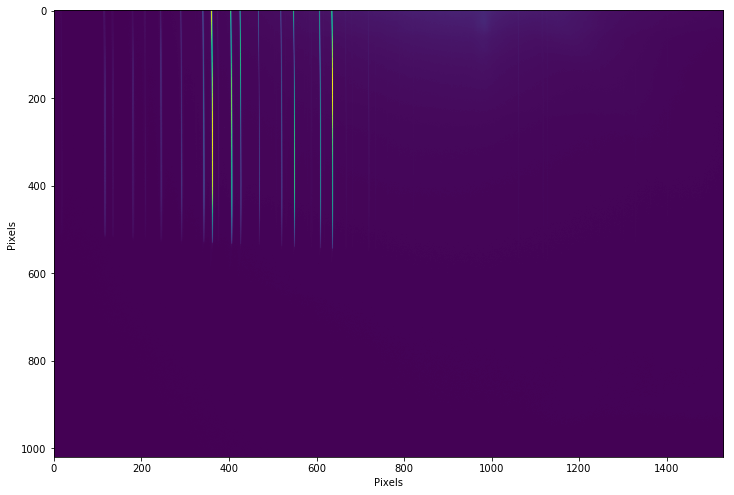

In [8]:
plt.imshow(avg_lamp)
plt.xlabel('Pixels')
plt.ylabel('Pixels')
plt.show()

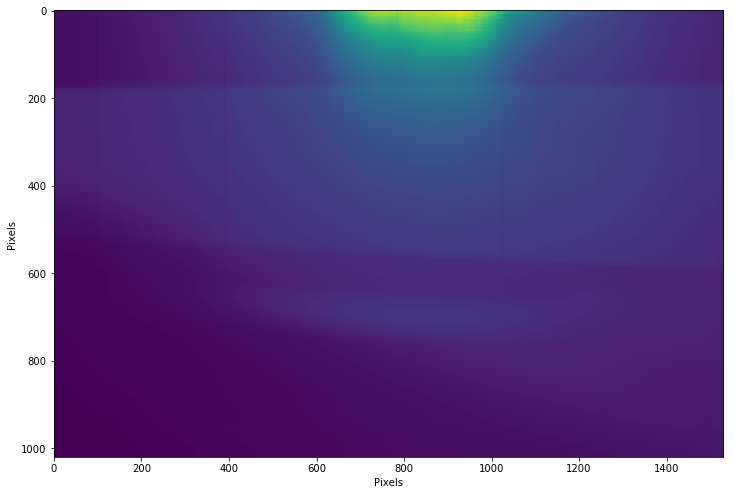

In [9]:
plt.imshow(avg_sun)
plt.xlabel('Pixels')
plt.ylabel('Pixels')
plt.show()

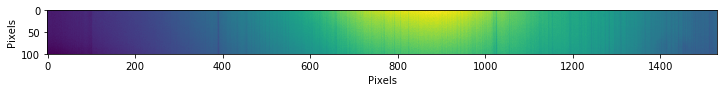

In [10]:
#A section of the calibrated images are taken for further consideration, 
#based on where the emission lines are the strongest in the average lamp_on image
plt.imshow(avg_sun[300:400,:])
plt.xlabel('Pixels')
plt.ylabel('Pixels')

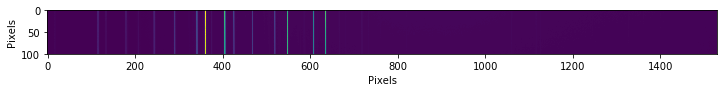

In [11]:
plt.imshow(avg_lamp[300:400,:])
plt.xlabel('Pixels')
plt.ylabel('Pixels')

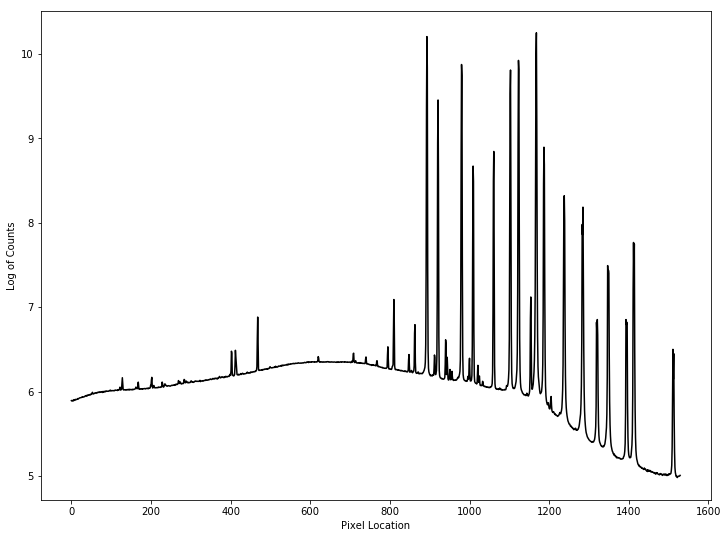

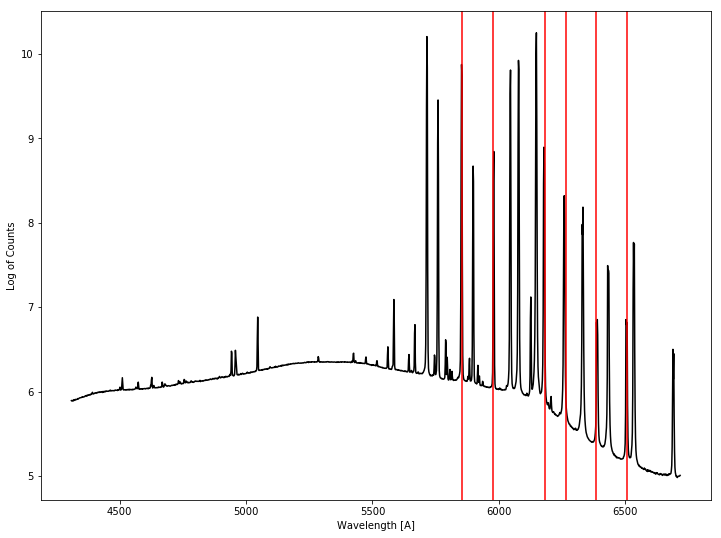

In [12]:
#Each column is averaged to produce a list of average values in each pixel column.
#Only the selected region is included in the calculation, in which the Ne emission lines are strongest and the 
#image of the sun is roughly uniform.

lamp_good = np.asarray(avg_lamp[300:400,:]).mean(axis=0) 
sun_good  = np.asarray(avg_sun[300:400,:]).mean(axis=0)

neon_lines = [5852.49, 5975.53, 6182.15, 6266.50, 6382.99, 6506.53] 
#These are some of the strongest Neon lines, in Angstroms.  They are used to calibrate the stretch and shift

#To get a good estimate for the stretch value I used the helium data
#because there are only two major lines so it was much easier to get a stretch estimate.  
#The analysis of the Helium data is in the notebook titled Helium_data_to_determine_stretch

stretch = 0.635  
shift = 4309

#The log of the averaged counts in each pixel column is plotted per pixel along the x axis of the image.
#The x axis data is flipped to account for the spectrum beind reversed on the detector.
#A verticle line is then placed at each Ne line as well so that the data can be shifted and stretched to match the position of the known lines
#using the estimated stretch value, the shift is determined by matching the known emission lines to the data.
#The stretch value was not changed, but the shift was.  

plt.plot((np.flip(np.arange(len(lamp_good)),0)), np.log(lamp_good), 'k-') 
plt.xlabel('Pixel Location')  #still in pixels so far
plt.ylabel('Log of Counts')
plt.show()

plt.plot((np.flip(np.arange(len(lamp_good)),0))/stretch+shift, np.log(lamp_good), 'k-') 
for line in neon_lines:
    plt.axvline(line,color='r')
plt.xlabel('Wavelength [A]')  
plt.ylabel('Log of Counts')
plt.show()



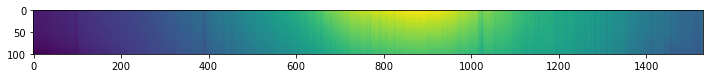

In [13]:
plt.imshow(avg_sun[300:400,:])

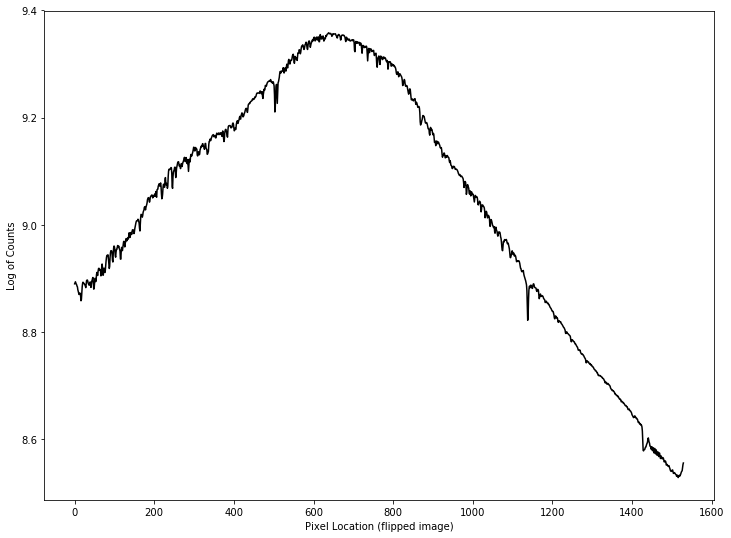

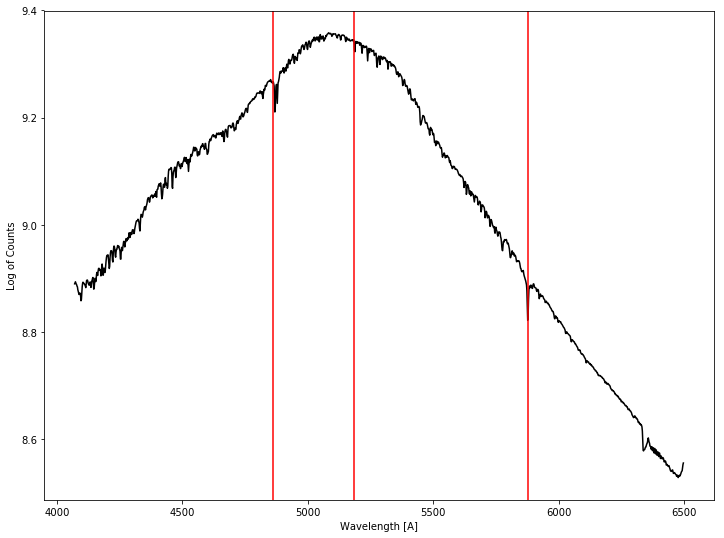

In [14]:
#The following are Fraunhofer lines in the solar spectrum, along with their names
sun_lines = [4861.34, 5183.62, 5875.618]
line_labels = ['F', 'b1', 'D3']

#Just like with the Neon data, the log of the average counts in each pixel column are plotted against pixel location on the x axis.
#Finally, the known absorption lines in the solar spectrum are fitted to the data with the stretch factor determined above.
#I changed the stretch very slightly to work more strongly with the solar spectrum.  Simply from 0.635 to 0.630.
#The shift changed as well.
#The final spectrum with known lines matched to observed lines is plotted with the x axis now represented in terms of wavelength.

stretch = 0.630 
shift = 4070 

plt.plot((np.flip(np.arange(len(sun_good)),0)), np.log(sun_good), 'k-') 
plt.xlabel('Pixel Location (flipped image)')  #still in pixels so far
plt.ylabel('Log of Counts')
plt.show()


plt.plot((np.flip(np.arange(len(sun_good)),0))/stretch+shift, np.log(sun_good), 'k-') 
for line in sun_lines:
    plt.axvline(line,color='r')
plt.xlabel('Wavelength [A]')
plt.ylabel('Log of Counts')
#plt.xlim(5000,5300)
plt.show()

#Now that lines have been matched up, the specific absorption lines notable in our data are identified.
#F, b1, and D3 and most prominent in our data.

